## Aaron Dao. MAE 598 Homework 4.
### Problem 1 (10 Points)

Sketch graphically the problem 

$$
\begin{aligned}
\min_{x_1,x_2} & \quad f({\bf x})=(x_1+1)^2+(x_2-2)^2\\
{\text{subject to }} & \quad g_1 = x_1-2\leq 0,{\quad} g_3 = -x_1\leq 0,\\
& \quad g_2 = x_2-1\leq 0, {\quad} g_4 = -x_2\leq 0.
\end{aligned}
$$ 



* (a) Find the optimum graphically.
* (b) Determine directions of feasible descent at the corner points of the feasible domain. 
* (c) Show the gradient directions of $f$ and $g_i$s at these points. 
* (d) Verify graphical results analytically using the KKT conditions.

**Solution**

The optimum is located, graphically, at (0,1) at point A. In all of the corner points except for A, the direction of feasible descent is shown by the $\vec{fd}$ vector, and the gradient directions of $f$ and $g_i$ are also shown and labeled.
![batman](598problem_1.jpg)

Sample calculation of gradient directions at point A:
$$\frac{\partial g_2}{\partial x }= \begin{bmatrix} 0 \\ 1 \end{bmatrix} $$
$$\frac{\partial g_3}{\partial x }= \begin{bmatrix} -1 \\ 0 \end{bmatrix} $$
$$\frac{\partial f}{\partial x }= \begin{bmatrix} 2x_1+2 \\ 2x_2-4 \end{bmatrix} $$

Verification with KKT conditions:<br>
$$L=(x_1+1)^2+(x_2-2)^2+\mu_1(x_1-2)+\mu_2(x_2-1)+\mu_3(-x_1)+\mu_4(-x_2)$$
$$\frac{\partial L}{\partial x}=\begin{bmatrix} 2(x_1+1)+\mu_1-\mu_3 \\ 2(x_2-2)+\mu_2+\mu_4 \end{bmatrix}= \begin{bmatrix} 0 \\ 0 \end{bmatrix}$$

If we guess that $g_2, g_3$ are active, then $\mu_2, \mu_3 >0$ and $\mu_1,\mu_4 =0$. Thus
$$\begin{aligned} x_1=0, &\quad x_2=1, \\ 2x_1+2-\mu_3=0, &\quad 2x_2-4+\mu_2=0 \\ \mu_3=2, &\quad \mu_2=2 \end{aligned}$$

Since $\mu_2,\mu_3 >0,$ this satisfies the KKT conditions.



---
### Problem 2 (10 Points)

Graph the problem 

$$
\begin{aligned}
\min_{x_1,x_2} & \quad  f=-x_1\\
{\text{subject to }} & \quad g_1=x_2-(1-x_1)^3\leq 0{\quad} {\rm and}{\quad} x_2\geq 0.
\end{aligned}
$$ 

* Find the solution graphically. 
* Then apply the optimality conditions. 
* Can you find a solution based on the optimality conditions? Why? (From Kuhn and Tucker, 1951.)

**Solution.**
Graphically, we see the solution to the problem lies at (1,0).

![batman](598problem_2.jpg)

Solving with KKT conditions:

The Lagrangian is $$ L = -x_1 + \mu_1(x_2-(1-x_1)^3) + \mu_2(-x_2) $$
$$\frac{\partial L}{\partial x}=\begin{bmatrix} -1 + 3\mu_1(1-x_1)^2 \\ \mu_1 - \mu_2 \end{bmatrix}= \begin{bmatrix} 0 \\ 0 \end{bmatrix} $$ 

Assume that $g_1, g_2$ are active, then $\mu_1, \mu_2 >0$. Then $x_1=1,\quad x_2 =0,$ and then solving for $\mu$ yields
$$ -1 + 3\mu_1(0)=0$$ $$ -1=0 $$ which is a contradiction. Thus, you **cannot** solve using KKT conditions because the optima is not regular, or in this case, the constraints are not affine.


---
### Problem 3 (30 Points)

Find a local solution to the problem 

$$
\begin{aligned}
\max_{x_1,x_2,x_3} & \quad  f=x_1x_2+x_2x_3+x_1x_3\\
{\text{subject to }} & \quad h=x_1+x_2+x_3-3=0.
\end{aligned}
$$ 

Use two methods: reduced gradient and Lagrange multipliers.

**Reduced Gradient**

![batman](598problem_3a.jpg)
![batman](598problem_3a-2.jpg)

**Lagrange Multipliers**

![batman](598problem_3b.jpg)


---
### Problem 4 (20 Points)

Use reduced gradient to	find the value(s) of the parameter $b$ for which the point $x_1=1$, $x_2=2$ is the solution to the problem 

$$
\begin{aligned}
\max_{x_1,x_2} & \quad  f=2x_{1} + bx_2\\
{\text{subject to }} & \quad g_1 = x_{1}^{2}+ x_{2}^{2}-5\leq 0\\
& \quad g_2= x_1- x_2-2\leq 0.
\end{aligned}
$$ 

**Solution**

![batman](598problem_4.jpg)

---
### Problem 5 (30 Points)

Find the solution for 

$$
\begin{aligned}
\min_{x_1,x_2,x_3} & \quad  f=x_{1}^{2}+x_{2}^{2}+x_{3}^{2}\\
{\text{subject to }} & \quad h_1 = x_{1}^{2}/4+x_{2}^{2}/5+x_{3}^{2}/25-1=0\\
& \quad h_2 = x_1+x_2-x_3= 0,
\end{aligned}
$$ 

by implementing the generalized reduced gradient algorithm.

Local solution exists at [-1.57387883  1.37722405 -0.19665479]


Text(0.5, 1.0, 'Convergence of error')

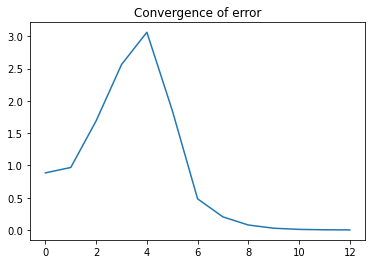

In [3]:
import numpy as np
from matplotlib import pyplot as plt

def objfun(x):
    x1=x[0]
    x2=x[1]
    x3=x[2]
    return x1**2+x2**2+x3**2

#%% Derivatives.

def Pfpd(x):
    return 2*x[0] 

def Pfps(x):
    return np.array([2*x[1], 2*x[2]])

def Phps(x):
    return np.array([[2/5*x[1], 2/25*x[2]],[1, -1]])

def Phpd(x):
    return np.array([[x[0]/2],[1]])

def Dfdd(x):  # REDUCED GRAD!
    # This is with x1 = d; x2,x3=s
    return Pfpd(x) - np.matmul( np.matmul(Pfps(x), np.linalg.inv(Phps(x))), Phpd(x) )

def xeval(x,a,dfdd): # For the linesearch.
    d_eval= (x[0]-a*dfdd)[0]
    s_eval= x[1:3] + a* np.transpose( np.matmul(  np.matmul(np.linalg.inv(Phps(x)) , Phpd(x) ), np.transpose([Dfdd(x)]) ) )[0]
    return np.append(d_eval,s_eval)

def linesearch(dfdd, x):
    a=1
    b=.5
    t=.3
    while objfun(xeval(x,a,dfdd)) > (objfun(x) - a*t* dfdd**2):
        a=b*a
    return a

def solve(x):  # Takes in intermediate x value [dk, sk0], gives final x value [dk, sk]
    while np.linalg.norm(np.array([ [ x[0]**2/4 + x[1]**2/5 + x[2]**2/25 -1 ], [x[0]+x[1]-x[2] ] ]))  > e: # While |h| > e....
        phps=Phps(x)
        skj1= np.transpose( np.transpose([x[1:3]]) - np.matmul( np.linalg.inv(phps), np.array([ [ x[0]**2/4 + x[1]**2/5 + x[2]**2/25 -1 ], [x[0]+x[1]-x[2] ] ])   ))  # Step 2 of the solve algorithm, but transposing the output.
        x=np.append(x[0:1], np.transpose(skj1[0]))
    return x
        
    
        

        
#%% THE LOOP

x0=np.array([1, 2, 3])  # Hard coded: x2 and x3 are state variables

e=10**(-3)

x_store=[x0]
err=[]


while np.linalg.norm(Dfdd(x_store[-1])) > e:
    x=x_store[-1]
    dfdd=Dfdd(x)
    #print('x is ' + str(x))
    #print('dfdd is ' + str(np.linalg.norm(dfdd)))
    err.append(np.linalg.norm(dfdd))  # At the beginning of the iteration, what's the error?
    # 4.1
    a= linesearch(dfdd, x)
    # 4.2
    dk= x[0]- a*dfdd
    # 4.3
    sk0= x[1:3] + a* np.transpose(  np.matmul(np.matmul(np.linalg.inv(Phps(x)), Phpd(x)),  np.transpose(dfdd)) )
    xk0=np.append(dk,sk0)  # Intermediate x value.
    #print('xk0 is ' +str(xk0))
    
    # 4.4
    x = solve(xk0)
    x_store.append(x)
    
print('Local solution exists at ' +str(x_store[-1]))
plt.plot(err)
plt.title('Convergence of error')